In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to C:\Users\TUF
[nltk_data]     DASH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/Aya123-sys/CVIP-data_science/main/phase_2/golden%20task/emails.csv")
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


# explanatory data analysis  

In [3]:
data.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [5]:
data_copy=data.copy()
for index, row in data_copy.iterrows():
    if row['spam'] == 1:
        data_copy.at[index, 'category'] = 'spam'
    else:
        data_copy.at[index,'category']='not a spam'

In [6]:
data_copy.drop('spam', axis=1, inplace=True)
data_copy

,text,category
0,Subject: naturally irresistible your corporate...,spam
1,Subject: the stock trading gunslinger fanny i...,spam
2,Subject: unbelievable new homes made easy im ...,spam
3,Subject: 4 color printing special request add...,spam
4,"Subject: do not have money , get software cds ...",spam
...,...,...
5723,Subject: re : research and development charges...,not a spam
5724,"Subject: re : receipts from visit jim , than...",not a spam
5725,Subject: re : enron case study update wow ! a...,not a spam
5726,"Subject: re : interest david , please , call...",not a spam


In [7]:
data_copy.groupby('category').describe()

text                                                            \
           count unique                                                top   
category                                                                     
not a spam  4360   4327  Subject: * special notification * aurora versi...   
spam        1368   1368  Subject: naturally irresistible your corporate...   

                 
           freq  
category         
not a spam    2  
spam          1

Text(0.5, 1.0, 'Histogram of Categories')

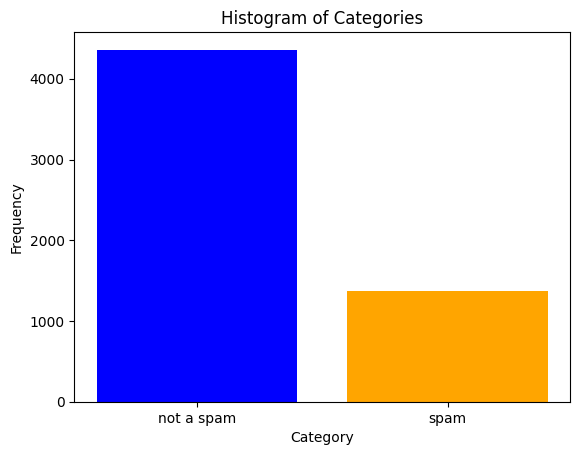

In [8]:
category_counts = data_copy['category'].value_counts()
plt.bar(category_counts.index, category_counts.values, color=['blue', 'orange'])
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram of Categories')

In [9]:
data

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


# filter the email text for natural language processing

In [10]:
from nltk.tokenize import word_tokenize,sent_tokenize
data['text']=data['text'].apply(word_tokenize)


In [11]:
data

,text,spam
0,"[Subject, :, naturally, irresistible, your, co...",1
1,"[Subject, :, the, stock, trading, gunslinger, ...",1
2,"[Subject, :, unbelievable, new, homes, made, e...",1
3,"[Subject, :, 4, color, printing, special, requ...",1
4,"[Subject, :, do, not, have, money, ,, get, sof...",1
...,...,...
5723,"[Subject, :, re, :, research, and, development...",0
5724,"[Subject, :, re, :, receipts, from, visit, jim...",0
5725,"[Subject, :, re, :, enron, case, study, update...",0
5726,"[Subject, :, re, :, interest, david, ,, please...",0


In [13]:
# removing any non-alphabetic characters. 
data['text'] = data['text'].apply(lambda x: [item for item in x if item.isalpha()])
data

,text,spam
0,"[Subject, naturally, irresistible, your, corpo...",1
1,"[Subject, the, stock, trading, gunslinger, fan...",1
2,"[Subject, unbelievable, new, homes, made, easy...",1
3,"[Subject, color, printing, special, request, a...",1
4,"[Subject, do, not, have, money, get, software,...",1
...,...,...
5723,"[Subject, re, research, and, development, char...",0
5724,"[Subject, re, receipts, from, visit, jim, than...",0
5725,"[Subject, re, enron, case, study, update, wow,...",0
5726,"[Subject, re, interest, david, please, call, s...",0


In [14]:
data['text']=data['text'].apply(lambda x: [item.lower() for item in x])


In [15]:
#all characters converted to lowercase.
data['text'] = data['text'].apply(lambda x: [item.lower() for item in x])


In [16]:
# filter out stopwords from your text data 
nltk.download('stopwords')
from nltk.corpus import stopwords
# Get the set of English stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\TUF
[nltk_data]     DASH\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [17]:
data['text']=data['text'].apply(lambda x: [item for item in x if item not in stop_words])


In [18]:
data

,text,spam
0,"[subject, naturally, irresistible, corporate, ...",1
1,"[subject, stock, trading, gunslinger, fanny, m...",1
2,"[subject, unbelievable, new, homes, made, easy...",1
3,"[subject, color, printing, special, request, a...",1
4,"[subject, money, get, software, cds, software,...",1
...,...,...
5723,"[subject, research, development, charges, gpg,...",0
5724,"[subject, receipts, visit, jim, thanks, invita...",0
5725,"[subject, enron, case, study, update, wow, day...",0
5726,"[subject, interest, david, please, call, shirl...",0


In [19]:
# Each word will be reduced to its base or root form 
from nltk.stem import PorterStemmer
p = PorterStemmer()
data['text'] = data['text'].apply(lambda x: [p.stem(item) for item in x])

In [20]:
data

,text,spam
0,"[subject, natur, irresist, corpor, ident, lt, ...",1
1,"[subject, stock, trade, gunsling, fanni, merri...",1
2,"[subject, unbeliev, new, home, made, easi, im,...",1
3,"[subject, color, print, special, request, addi...",1
4,"[subject, money, get, softwar, cd, softwar, co...",1
...,...,...
5723,"[subject, research, develop, charg, gpg, forwa...",0
5724,"[subject, receipt, visit, jim, thank, invit, v...",0
5725,"[subject, enron, case, studi, updat, wow, day,...",0
5726,"[subject, interest, david, pleas, call, shirle...",0


In [21]:
data['text'] = data['text'].apply(lambda x: " ".join(x))

In [22]:
data

,text,spam
0,subject natur irresist corpor ident lt realli ...,1
1,subject stock trade gunsling fanni merril muzo...,1
2,subject unbeliev new home made easi im want sh...,1
3,subject color print special request addit info...,1
4,subject money get softwar cd softwar compat gr...,1
...,...,...
5723,subject research develop charg gpg forward shi...,0
5724,subject receipt visit jim thank invit visit ls...,0
5725,subject enron case studi updat wow day super t...,0
5726,subject interest david pleas call shirley cren...,0


# Spliting the data into Training data and Testing data

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data.text,data.spam,test_size=0.25)


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(min_df=0.0, max_df=1, binary = False, ngram_range = (1,3))
cv_x_train = count_vect.fit_transform(x_train)
cv_x_text = count_vect.transform(x_test)


In [32]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb_train_spam = lb.fit_transform(y_train)
lb_test_spam = lb.fit_transform(y_test)

In [34]:
from sklearn.naive_bayes import MultinomialNB
multi = MultinomialNB()
model_training = multi.fit(cv_x_train, lb_train_spam)
model_prediction = multi.predict(cv_x_text)
from sklearn.metrics import accuracy_score
accuracy_of_model = accuracy_score(lb_test_spam, model_prediction)
print("Accuracy :", accuracy_of_model*100," %")

Accuracy : 92.52793296089385  %


C:\Users\TUF DASH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
